In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install idx2numpy

from tensorflow.keras import Sequential, utils, optimizers
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
import idx2numpy
import cv2 as cv
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

train_data_path = '/content/gdrive/My Drive/data8/train-images-idx3-ubyte.gz'
test_data_path = '/content/gdrive/My Drive/data8/t10k-images-idx3-ubyte.gz'
train_label_path = '/content/gdrive/My Drive/data8/train-labels-idx1-ubyte.gz'
test_label_path = '/content/gdrive/My Drive/data8/t10k-labels-idx1-ubyte.gz'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
  Created wheel for idx2numpy: filename=idx2numpy-1.2.2-cp36-none-any.whl size=8032 sha256=07f814051cc2023c9942d839f0db8c4e62ec433630c447523db94bf9971d4e5e
  Stored in directory: /root/.cache/pip/wheels/7a/b5/69/3e0757b3086607e95db70661798fdf98a77a0bb79c54e1f320
Successfully built idx2numpy


In [0]:

class MiniVGG():

	def __init__(self):
		self.network = Sequential()
		
		self.network.add(Conv2D(32, (3, 3), padding="same", input_shape=(28,28,1)))
		self.network.add(Activation("relu"))
		self.network.add(BatchNormalization())

		self.network.add(Conv2D(32, (3, 3), padding="same"))
		self.network.add(Activation("relu"))
		self.network.add(BatchNormalization())

		self.network.add(MaxPooling2D(pool_size=(2, 2)))
		self.network.add(Dropout(0.1))

		# second CONV => RELU => CONV => RELU => POOL layer set
		self.network.add(Conv2D(64, (3, 3), padding="same"))
		self.network.add(Activation("relu"))
		self.network.add(BatchNormalization())

		self.network.add(Conv2D(64, (3, 3), padding="same"))
		self.network.add(Activation("relu"))
		self.network.add(BatchNormalization())

		self.network.add(MaxPooling2D(pool_size=(2, 2)))
		self.network.add(Dropout(0.3))

		# first (and only) set of FC => RELU layers
		self.network.add(Flatten())
		self.network.add(Dense(512))
		self.network.add(Activation("relu"))
		self.network.add(BatchNormalization())
		self.network.add(Dropout(0.5))

		# softmax classifier
		self.network.add(Dense(10))
		self.network.add(Activation("softmax"))

	def extract_data(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(16)
			buf = f.read(28 * 28 * num_img)
			train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
			train_data = train_data.reshape(num_img, 28, 28, 1)
			return train_data

	def extract_labels(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(8)
			buf = f.read(num_img)
			labels= np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
			# labels = labels.reshape(num_img, 28, 28, 1)
			return labels


In [3]:
vgg = MiniVGG()

train_data = vgg.extract_data(train_data_path, 60000)
train_labels = vgg.extract_labels(train_label_path, 60000)
test_data = vgg.extract_data(test_data_path, 10000)
test_labels = vgg.extract_labels(test_label_path, 10000)




Fd =open('/content/gdrive/My Drive/data8/Network_Best_one.h5', 'w+') 
Fd.close()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10 )
cs= ModelCheckpoint(filepath='/content/gdrive/My Drive/data8/Network_Best_one.h5', monitor='val_loss', save_best_only=True)
vgg.network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = vgg.network.fit(train_data, train_labels, batch_size = 170, validation_data=(test_data, test_labels), epochs=300,callbacks = [es,cs])
vgg.network.save('/content/gdrive/My Drive/data8/Network_config_oct.h5')
with open('/content/gdrive/My Drive/data8/History_config_oct', 'wb') as file:
  pickle.dump(hist.history, file)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 17s 280us/sample - loss: 0.4475 - acc: 0.8475 - val_loss: 0.2941 - val_acc: 0.8945
Epoch 2/300
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2818 - acc: 0.8987 - val_loss: 0.2630 - val_acc: 0.9039
Epoch 3/300
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2415 - acc: 0.9135 - val_loss: 0.2503 - val_acc: 0.9102
Epoch 4/300
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2191 - acc: 0.9198 - val_loss: 0.2267 - val_acc: 0.9169
Epoch 5/300
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2003 - acc: 0.9263 - val_loss: 0.2199 - val_acc: 0.9193
Epoch 6/300
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1844 - acc: 0.9325 - val_loss: 0.2226 - val_acc: 0.9198
Epoch 7/300
60000/60000 [==============================] - 10s 168us/sample - loss: 0.1713 - acc: 0

OUTPUT FROM BEST MODEL
10000/10000 - 1s - loss: 0.1987 - acc: 0.9319


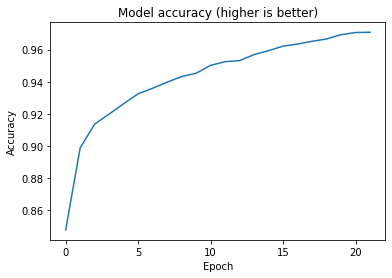

In [5]:


print("OUTPUT FROM BEST MODEL")
#Bestmodel = MiniBatch_GD()
vgg.network.load_weights('/content/gdrive/My Drive/data8/Network_Best_one.h5')
oss, acc = vgg.network.evaluate(test_data,  test_labels, verbose=2)





import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()